# Text Analysis:

## Import and read data

In [1]:
import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
from nltk.corpus import stopwords 
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

In [2]:
## Let us check the version of the various libraries
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.20.1
Pandas version: 1.2.4
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.6.1
Matplotlib version: 3.3.4


In [3]:
from warnings import filterwarnings         # This is mainly used to avoid the unnecessary warnings which come while running the code due to the changes in the python liabrary 
filterwarnings("ignore")

In [4]:
df1=pd.read_excel('Project 1.xlsx')

In [5]:
df1.head()

,Name,Speech
0,Roosevelt,On each national day of inauguration since 178...


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    1 non-null      object
 1   Speech  1 non-null      object
dtypes: object(2)
memory usage: 144.0+ bytes


In [7]:
all_Words=[x for x in pd.Series(' '.join(df1['Speech']).split())] 

In [8]:
nltk.FreqDist(all_Words).most_common(10)

[('the', 104),
 ('of', 81),
 ('and', 41),
 ('to', 35),
 ('in', 30),
 ('a', 28),
 ('is', 24),
 ('--', 22),
 ('we', 22),
 ('that', 21)]

In [9]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

# Converting all the words to lower casse
all_words = (x.lower() for x in all_Words)# we can skip this line since we have already converted all the words to lowercase
# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_words if word not in stopwords]


# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)

# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 
word_features = [item[0] for item in all_words_freq.most_common(2000)]

In [10]:
word_features

['--',
 'know',
 'us',
 'life',
 'people',
 'nation',
 'human',
 'years',
 'freedom',
 'spirit',
 'speaks',
 'day',
 'men',
 'democracy',
 'new',
 'nation,',
 'body',
 'must',
 'something',
 'faith',
 'america',
 'united',
 'task',
 'nations',
 'government',
 'future',
 'every',
 'continent',
 'like',
 'person,',
 'sacred',
 'came',
 'first',
 'destiny',
 'national',
 'sense',
 'create',
 'together',
 'disruption',
 'come',
 'midst',
 'stock',
 'may',
 'spirit.',
 'little',
 'measure',
 'doubt',
 'measured',
 'republic',
 'security',
 'and,',
 'many',
 'built',
 'democracy.\\n\\nfor',
 'within',
 'constitution',
 'states.',
 'american',
 'seen',
 'cannot',
 'enterprise',
 'free',
 'forms',
 'still',
 'mind',
 'hopes',
 'find',
 'even',
 'upon',
 'early',
 'history.',
 'written',
 'could',
 'enough',
 'mind,',
 'would',
 'words',
 'preservation',
 'inauguration',
 'since',
 '1789,',
 'renewed',
 'dedication',
 'states.\\n\\nin',
 "washington\\'s",
 'weld',
 'nation.\\n\\nin',
 "lincoln\

### Number of words:

In [11]:
## Let's get a word count without writing a lambda function

df1['totalwords'] = [len(x.split()) for x in df1['Speech'].tolist()]
df1[['Speech','totalwords']].head()

,Speech,totalwords
0,On each national day of inauguration since 178...,1323


In [12]:
df1['word_count'] = df1['Speech'].apply(lambda x: len(str(x).split(" ")))
df1[['Speech','word_count']].head()

,Speech,word_count
0,On each national day of inauguration since 178...,1323


### Number of Characters- including spaces:

In [13]:
df1['char_count'] = df1['Speech'].str.len()
df1[['Speech','char_count']].head()

,Speech,char_count
0,On each national day of inauguration since 178...,7651


In [14]:
df1['Speech']

0    On each national day of inauguration since 178...
Name: Speech, dtype: object

In [15]:
len(df1['Speech'])

1

In [16]:
df1['sentence'] = [len(x.split()) for x in df1['Speech'].tolist()]
df1[['Speech','sentence']].head()

,Speech,sentence
0,On each national day of inauguration since 178...,1323


### Average Word Length:

In [17]:
def avg_word(sentence):
    words = sentence.split() #splitting the words separately from the input taken
    return (sum(len(word) for word in words)/len(words)) # getting the average number of words in the each of the entries

df1['avg_word'] = df1['Speech'].apply(lambda x: avg_word(x))
df1[['Speech','avg_word']].head()

,Speech,avg_word
0,On each national day of inauguration since 178...,4.783825


### Number of stop Words:

In [18]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df1['stopwords'] = df1['Speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
df1[['Speech','stopwords']].head()

,Speech,stopwords
0,On each national day of inauguration since 178...,632


### Number of special character:

In [19]:
df1['hastags'] = df1['Speech'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df1[['Speech','hastags']].head()

,Speech,hastags
0,On each national day of inauguration since 178...,0


### Number of numerics:

In [20]:
df1['numerics'] = df1['Speech'].apply(lambda x: len(re.findall(r'[0-9]',x)))
df1[['Speech','numerics']].head()

,Speech,numerics
0,On each national day of inauguration since 178...,14


### Number of Uppercase Words:

In [21]:
df1['upper'] = df1['Speech'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df1[['Speech','upper']].head()

,Speech,upper
0,On each national day of inauguration since 178...,1


### Number of Uppercase Letters:

In [22]:
df1['upper_letter'] = df1['Speech'].apply(lambda x: len(re.findall(r'[A-Z]',x)))
df1[['Speech','upper_letter']].head()

,Speech,upper_letter
0,On each national day of inauguration since 178...,119


### Lower Case conversion:

In [23]:
df1['Speech'] = df1['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df1['Speech'].head()

0    on each national day of inauguration since 178...
Name: Speech, dtype: object

### Removal of Punctuation:

In [24]:
df1['Speech'] = df1['Speech'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
df1['Speech'].head()

0    on each national day of inauguration since 178...
Name: Speech, dtype: object

### Removal of StopWords:

In [25]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df1['Speech'] = df1['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df1['Speech'].head()

0    national day inauguration since 1789 people re...
Name: Speech, dtype: object

### Common Repeating words:

In [26]:
freq = pd.Series(' '.join(df1['Speech']).split()).value_counts()[:10]
freq

know         10
nation       10
us            8
spirit        8
life          7
democracy     6
america       6
people        6
years         6
freedom       5
dtype: int64

### Word Count after removing stop words:

In [27]:
df1['totalwords'] = [len(x.split()) for x in df1['Speech'].tolist()]
df1[['Speech','totalwords']].head()

,Speech,totalwords
0,national day inauguration since 1789 people re...,624


### Rare Words Removal:

In [32]:
freq = pd.Series(' '.join(df1['Speech']).split()).value_counts()[-10:]
freq
## As it is difficult to make out if these words will have association in text analytics or not, 
## hence to start with these words are kept in the dataset

well         1
knowledge    1
alien        1
plain        1
live         1
matters      1
common       1
spreading    1
purposes     1
threeway     1
dtype: int64

### Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach:

In [33]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df1['Speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    nation day inaugur sinc 1789 peopl renew sens ...
Name: Speech, dtype: object

In [34]:
## Let's get a word count without writing a lambda function after removing the stopwords:

df1['totalwords'] = [len(x.split()) for x in df1['Speech'].tolist()]
df1[['Speech','totalwords']].head()

,Speech,totalwords
0,national day inauguration since 1789 people re...,624


In [35]:
df1['Speech'][0]  ## sentences after removing the stops words:

'national day inauguration since 1789 people renewed sense dedication united statesnnin washingtons day task people create weld together nationnnin lincolns day task people preserve nation disruption withinnnin day task people save nation institutions disruption withoutnnto us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inactionnnlives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure livennthere men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tidennbut americans know truenneight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisivelynnthese later years living years fruitful years people democracy brought us greater security hope better understandin

In [36]:
all_Words=[x for x in pd.Series(' '.join(df1['Speech']).split())] 
# 1st we are spliting each row of the dataframe into words.
# 2nd we are joining all the above words with a space between them.
# 3rd we are making a Series out of it.
# 4th we we are extracting each word one by one and storing it in the variable all_Words.

In [37]:
nltk.FreqDist(all_Words).most_common(3)

[('nation', 10), ('know', 10), ('us', 8)]

### Creating a Wordcloud:

In [38]:
# Recall Apple_Tweets['Tweet'] from above. It has been processed at a basic level!

df1['Speech'].iloc[30:31] #Checking a tweet at random!

Series([], Name: Speech, dtype: object)

In [39]:
!pip install wordcloud

In [40]:
# Removing symbols and punctuations 
# Extending the list of stop words (including words like Apple, bitly, dear, please, etc.)
stop_words = list(stopwords.words('english'))

In [41]:
#Removing stop words (extended list as above) from the corpus 

corpus = df1['Speech'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus

0    national day inauguration since 1789 people re...
Name: Speech, dtype: object

In [42]:
wc_a = ' '.join(corpus)

Word Cloud for Speech of Roosevelt


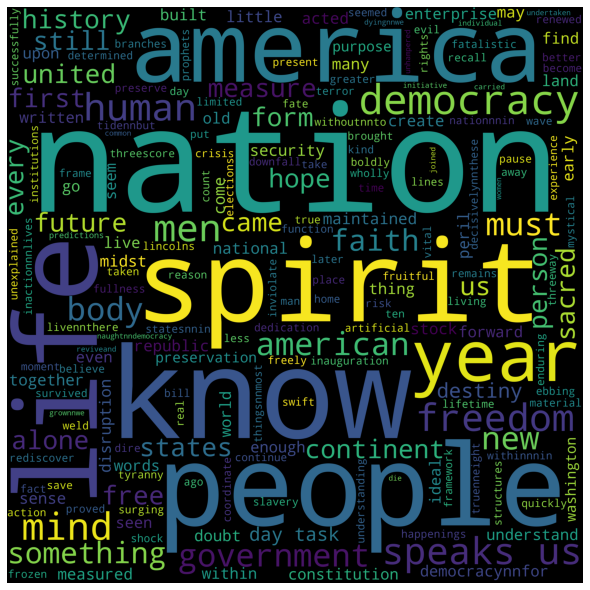

In [43]:
import os
import matplotlib.pyplot as plt
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Speech of Roosevelt")
plt.show()